# Lecture 23: Clustering

## Supervised vs Unsupervised learning
* Supervised: we have `X` (data samples, with features) and `y` (label for the samples)
* Unsupervised: we do not have labels or we have to come up with labels ourselves.


## Clustering

Clustering is an "unsupervised" learning algorithm as well as an efficient data preprocessor. 

* For preprocessing data, clustering can clean outliers (recall in the regression example, several "bad" data points can mess up the whole model).
* Clustering algorithm can find features common in a group; for example, the $k$-means algorithm represents each cluster by a single mean vector.
* Dimension reduction: PCA aims at compressing the $K$ features whereas clustering aims at compressing the $N$ data-points.



# (Reading) k-means clustering

----


## Problem formulation

Given a set of data samples $(\mathbf{x}^{(1)}, \dots,  \mathbf{x}^{(N)})$ without any label (no $y$). Each observation is a $d$-dimensional real vector ($d$ features). We can partition these $N$ samples into $k$ sets ($k\leq N$, hopefully $k\ll N$): $\mathcal{S} = \{S_1, S_2,\dots, S_k\}$. $S_i$ is called the $i$-th cluster.

$k$-means clustering is to minimize the within-cluster sum of squares (i.e. variance): to find a partition $\mathcal{S}$ so that we have the following mimimum is achieved
$$
\underset{\mathbf {S} }{\min }\sum _{i=1}^{k}\sum _{\mathbf {x} \in S_{i}}
\left\|\mathbf {x} -\boldsymbol{\mu}_{i}\right\|^{2} \quad \text{where }\; 
\boldsymbol{\mu}_{i} = \frac{1}{|S_i|} \sum _{\mathbf{x} \in S_{i}} \mathbf{x}.
$$

The problem above looks "straightforward" but it is highly nonlinear and not trivial.

----

## Distance choice

In the function above, the Eucliean distance is used, i.e.,
$$
\| \mathbf{x}\| = \sqrt{x_1^2 + \dots + x_d^2}
$$
For $k$-NN, different distances can be used, e.g., Hamming distance in $k$-NN for digit recognition, Manhattan and Chebyshev distances are often used as well. However, $k$-means uses *ONLY* Euclidean distances. The reason is that $k$-means is implicitly based on pairwise Euclidean distances between data points, because the function we want to minimize, i.e., within-cluster variance, is the sum of squared deviations from the centroids, which is equal to the sum of pairwise squared Euclidean distances divided by the number of points. Since $k$-means minimizes this within-cluster variance, now if we look at the definition of variance, it is identical to the sum of squared Euclidean distances from the centroids.

----

## Algorithm
* Step 1: Start with initial guesses for cluster centers (centroids).

* Step 2: For each data point, find the closest cluster center.

* Step 3: Move each data point to the cluster that is nearest to it (partitioning the data into clusters).

* Step 4: Update the centroid in each cluster by the mean of data points in the clusters from Step 3.

* Iterate the Step 2-4 above until convergence.

**Convergence**: we say the algorithm has converged when the assignments for clusters no longer change. A drawback of $k$-means is that it does not guarantee to find the global minimum (only local minimum).

## Iris dataset
Recall data set we have used for $k$-NN:
[Iris Flower Dataset (IFD)](https://archive.ics.uci.edu/ml/datasets/Iris), or you can download from [UCI machine learning repo on Kaggle](https://www.kaggle.com/uciml/iris). Here we will use `scikit-learn`'s dataset module to import it. Our goal is divide the dataset into 3 clusters without any help from labeling. 

From the visualization we can see the data is, to a certain degree, well-separated linearly (by planes or lines).

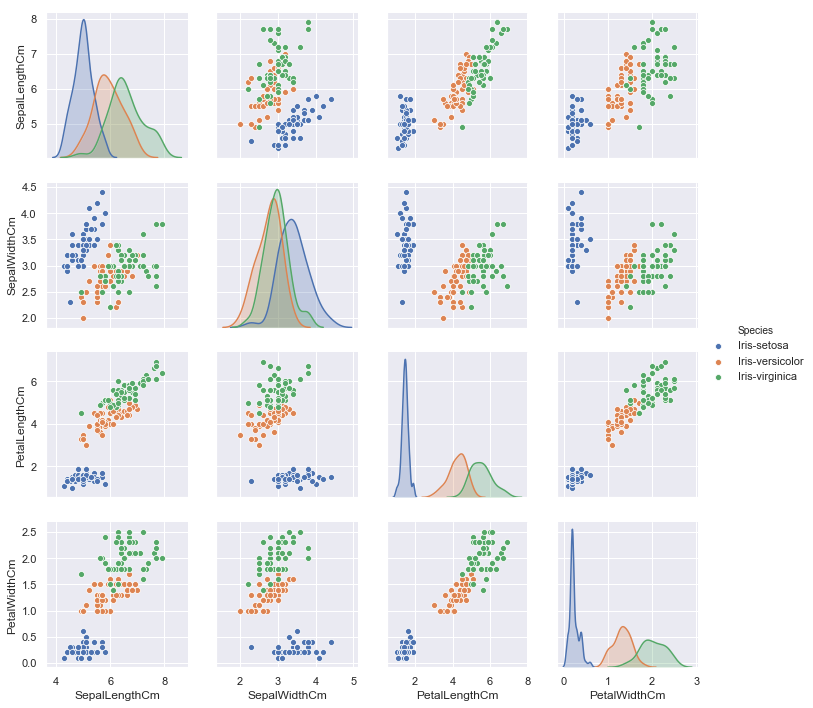

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# if we load the raw Iris.csv, we have to pre-process the data
iris_data = pd.read_csv('Iris.csv')
sns.set()
sns.pairplot(iris_data.drop(labels = ['Id'], axis=1), hue='Species')
plt.show()

In [5]:
import numpy as np
from sklearn.datasets import load_iris

In [6]:
iris_data_proc = load_iris()
X = iris_data_proc.data
# no need for the following labels y
y = iris_data_proc.target

In [25]:
# initialize: randomly divide the data into 3 clusters and compute the means (centroids)
np.random.seed(1)
X_random = np.random.permutation(X)
centroids = np.zeros((3,X.shape[1])) # initialize 3 centroids
# compute the mean of each cluster
centroids[0,:] = np.mean(X_random[:50], axis = 0)
centroids[1,:] = np.mean(X_random[51:-50],axis = 0)
centroids[2,:] = np.mean(X_random[-50:], axis= 0)

In [26]:
centroids # centroids[i,:] is the mean of the samples in the i-th cluster

array([[5.918     , 3.106     , 3.73      , 1.188     ],
       [6.00816327, 3.05714286, 4.13265306, 1.36122449],
       [5.622     , 3.002     , 3.464     , 1.072     ]])

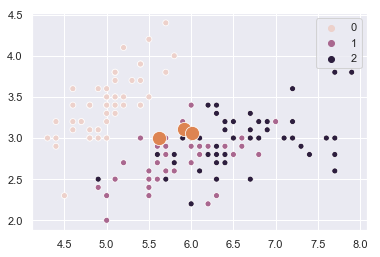

In [27]:
# visualizing where these centroids are (the initial randomly-chosen clusters)
# they are close to the overall center b/c the random initialization
sns.scatterplot(x= X[:,0], y = X[:,1], hue= y)
sns.scatterplot(x= centroids[:,0], y=centroids[:,1], s = 200)
plt.show()

In [59]:
## the following function returns an array containing the index to the nearest centroid for each sample in X
def closest_centroid(X, centroids):
#     distances_to_centroids = np.sqrt(((X - centroids[:, np.newaxis, :])**2).sum(axis=2))
    distances_squared = np.apply_along_axis(np.sum, axis = 2, arr = (X - centroids[:, np.newaxis, :])**2 )
    distances_to_centroids = np.sqrt(distances_squared)
    return np.argmin(distances_to_centroids, axis=0)

# the following function returns the new centroids assigned from the sample closest to them
def move_centroids(X, centroids):
    centroids_new = np.zeros_like(centroids) # the new centroids, same dimension with the old centroids
    for k in range(centroids.shape[0]):
        # idx_closest_centroids is the indices of the samples in X that are closest to the k-th centroids
        # idx_closest_centroids is a boolean array
        # for using boolean array as indices of another array, please refer to Lab 9 practice
        idx_closest_centroids = (closest_centroid(X, centroids) == k)
        centroids_new[k] = np.mean(X[idx_closest_centroids,:], axis=0)
    return centroids_new

In [60]:
centroids = move_centroids(X, centroids)

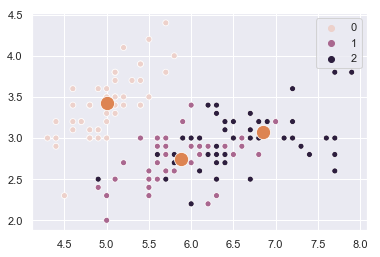

In [61]:
# visualizing where these randomly centroids are after 1 moving iteration
sns.scatterplot(x= X[:,0], y = X[:,1], hue= y)
sns.scatterplot(x= centroids[:,0], y=centroids[:,1], s = 200)
plt.show()

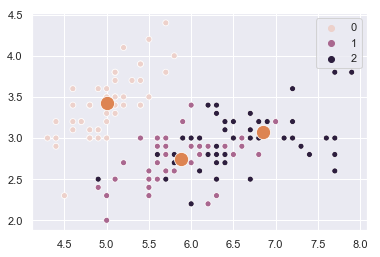

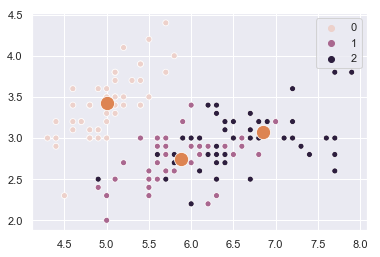

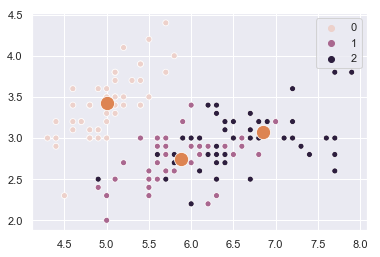

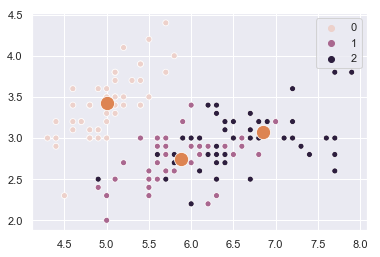

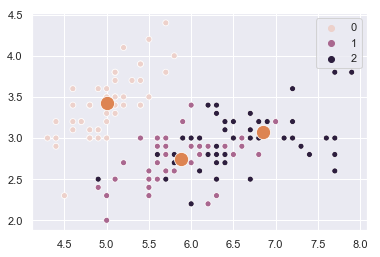

In [31]:
# moving the centroids for a couple more of iterations
for i in range(50):
    centroids = move_centroids(X, centroids)
    if (i+1) % 10 == 0:
        sns.scatterplot(x = X[:,0], y = X[:,1], hue= y)
        sns.scatterplot(x = centroids[:,0], y=centroids[:,1], s = 200)
        plt.show()

In [51]:
# prediction, we have not even use the labels....
y_pred = closest_centroid(X, centroids)
y_pred_processed = np.zeros_like(y_pred)

# post-processing the label predicted, so that the cluster indices match the label indices
for i in range(3):
    idx_i = (y_pred == i)
    y_pred_processed[idx_i] = np.rint(np.mean(y[idx_i])) 
    # we have to assume the clustering is accurate enough in order that this trick work

print("Clustering accuracy is:", np.mean(y_pred_processed == y))

Clustering accuracy is: 0.8866666666666667


## Vectorized implementation of clustering

Let us figure out what in details the functions `closest_centroid()` and `move_centroids()` above are doing.

In [21]:
centroids.shape

(3, 4)

In [20]:
X.shape

(150, 4)

We want to compute the distances of `X` to each cluster's centroids, but `np.sum` on `(X - centroids)**2` does not work because `(3,4)` array cannot be broadcast into `(150,4)` array. However, the following code work.

In [53]:
X - centroids[0,:]
# or X - centroids[0,:].reshape(1,-1)

array([[-0.78360656,  0.75901639, -2.98852459, -1.23442623],
       [-0.98360656,  0.25901639, -2.98852459, -1.23442623],
       [-1.18360656,  0.45901639, -3.08852459, -1.23442623],
       [-1.28360656,  0.35901639, -2.88852459, -1.23442623],
       [-0.88360656,  0.85901639, -2.98852459, -1.23442623],
       [-0.48360656,  1.15901639, -2.68852459, -1.03442623],
       [-1.28360656,  0.65901639, -2.98852459, -1.13442623],
       [-0.88360656,  0.65901639, -2.88852459, -1.23442623],
       [-1.48360656,  0.15901639, -2.98852459, -1.23442623],
       [-0.98360656,  0.35901639, -2.88852459, -1.33442623],
       [-0.48360656,  0.95901639, -2.88852459, -1.23442623],
       [-1.08360656,  0.65901639, -2.78852459, -1.23442623],
       [-1.08360656,  0.25901639, -2.98852459, -1.33442623],
       [-1.58360656,  0.25901639, -3.28852459, -1.33442623],
       [-0.08360656,  1.25901639, -3.18852459, -1.23442623],
       [-0.18360656,  1.65901639, -2.88852459, -1.03442623],
       [-0.48360656,  1.

In [55]:
(X - centroids[0,:].reshape(1,-1)).shape

(150, 4)

In [56]:
(X - centroids[0,:]).shape

(150, 4)

An `(1,4)` or `(4,)` array can be automatically broadcast into matching `(150,4)` array, so that we can do element-wise addition/subtraction/multiplication, etc. This is the vectorization technique we have learned before midterm.

In [58]:
centroids[:,np.newaxis,:].shape

(3, 1, 4)

In [57]:
(X- centroids[:, np.newaxis,:]).shape

(3, 150, 4)

A `(150,4)` array and `(3,1,4)` array do subtraction is the same as "`(150,4)` array and `(3,150,4)` array doing subtraction". The result code is:
```python
(X - centroids[:, np.newaxis, :])**2
```
This computes the element-wise squared difference, then using `sum` along the third axis (`axis = 2`) yields the distance squared:
```python
np.apply_along_axis(np.sum, axis = 2, arr = (X - centroids[:, np.newaxis, :])**2)
```
The code above is equivalent to the following more compact form:
```python
((X - centroids[:, np.newaxis, :])**2).sum(axis=2)
```

In [15]:
closest_centroid(X, centroids)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [36]:
closest_centroid(X, centroids) == 1

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False,

Boolean array can be used as indices.

In [39]:
X[closest_centroid(X, centroids) == 1]

array([[5.5, 2.3, 4. , 1.3],
       [5.7, 2.8, 4.5, 1.3],
       [4.9, 2.4, 3.3, 1. ],
       [5.2, 2.7, 3.9, 1.4],
       [5. , 2. , 3.5, 1. ],
       [5.9, 3. , 4.2, 1.5],
       [6. , 2.2, 4. , 1. ],
       [6.1, 2.9, 4.7, 1.4],
       [5.6, 2.9, 3.6, 1.3],
       [5.6, 3. , 4.5, 1.5],
       [5.8, 2.7, 4.1, 1. ],
       [6.2, 2.2, 4.5, 1.5],
       [5.6, 2.5, 3.9, 1.1],
       [6.1, 2.8, 4. , 1.3],
       [6.1, 2.8, 4.7, 1.2],
       [6.4, 2.9, 4.3, 1.3],
       [6.6, 3. , 4.4, 1.4],
       [6. , 2.9, 4.5, 1.5],
       [5.7, 2.6, 3.5, 1. ],
       [5.5, 2.4, 3.8, 1.1],
       [5.5, 2.4, 3.7, 1. ],
       [5.8, 2.7, 3.9, 1.2],
       [5.4, 3. , 4.5, 1.5],
       [6. , 3.4, 4.5, 1.6],
       [6.3, 2.3, 4.4, 1.3],
       [5.6, 3. , 4.1, 1.3],
       [5.5, 2.5, 4. , 1.3],
       [5.5, 2.6, 4.4, 1.2],
       [6.1, 3. , 4.6, 1.4],
       [5.8, 2.6, 4. , 1.2],
       [5. , 2.3, 3.3, 1. ],
       [5.6, 2.7, 4.2, 1.3],
       [5.7, 3. , 4.2, 1.2],
       [5.7, 2.9, 4.2, 1.3],
       [6.2, 2

## In-class exercise:

The `scikit-learn` has a submodule called [`sklearn.cluster`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster). 
* Read the [reference of the k-means clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) and repeat the clustering procedure above for the Iris dataset.
* `scikit-learn` has built-in functions to compute the distance (together with indices) from a point to a set of points:
[`pairwise_distance`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html) and [`pairwise_distance_argmin`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances_argmin.html), read the references, and try to replace certain routine in the k-means implementation.